In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("../input/he_challenge_data/data"))

['train', 'test', 'train.csv', 'sample_submission.csv', 'test.csv']


### Need pretrainedmodels to load the pretrained Cedene models into fastai.
### https://github.com/Cadene/pretrained-models.pytorch

In [2]:
!pip install pretrainedmodels

     |████████████████████████████████| 61kB 2.4MB/s 
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-cp36-none-any.whl size=60963 sha256=bc502da5edc81e2907335a007b96b7aa1b0036bcbf8a89feb2e5cc5967d1d003
  Stored in directory: /tmp/.cache/pip/wheels/69/df/63/62583c096289713f22db605aa2334de5b591d59861a02c2ecd
Successfully built pretrainedmodels


In [3]:
from torchvision.models import *
import pretrainedmodels

from fastai import *
from fastai.vision import *
from fastai.vision.models import *
from fastai.vision.learner import model_meta
import fastai

from utils import *
import sys
import torch
fastai.__version__

'1.0.57'

In [4]:
lis = os.listdir('../input/he_challenge_data/data/train')

In [5]:
sub = pd.read_csv('../input/he_challenge_data/data/sample_submission.csv')

In [6]:
sub.shape

(2009, 2)

In [7]:
path = "../input/he_challenge_data/data/train"

In [8]:
## test filenames to be used to create final submission.
filenames = os.listdir('../input/he_challenge_data/data/test')

In [9]:
df = pd.read_csv('../input/he_challenge_data/data/train.csv')

In [10]:
df.head()

,image_id,category
0,0,77
1,1,81
2,2,52
3,3,72
4,4,58


In [11]:
tfms = get_transforms(flip_vert=False,max_zoom=1.0,max_warp=0,do_flip=False,xtra_tfms=[cutout()])
data = (ImageList.from_csv(path, csv_name = '../train.csv', suffix='.jpg')
        .split_by_rand_pct()              
        .label_from_df()            
        .add_test_folder(test_folder = '../test')              
        .transform(tfms, size=400)
        .databunch(num_workers=0,bs=8)) 

tfms1 = get_transforms(flip_vert=False,max_zoom=1.0,max_warp=0,do_flip=False)
data1 = (ImageList.from_csv(path, csv_name = '../train.csv', suffix='.jpg')
        .split_by_rand_pct()              
        .label_from_df()            
        .add_test_folder(test_folder = '../test')              
        .transform(tfms1, size=400)
        .databunch(num_workers=0,bs=8)) 

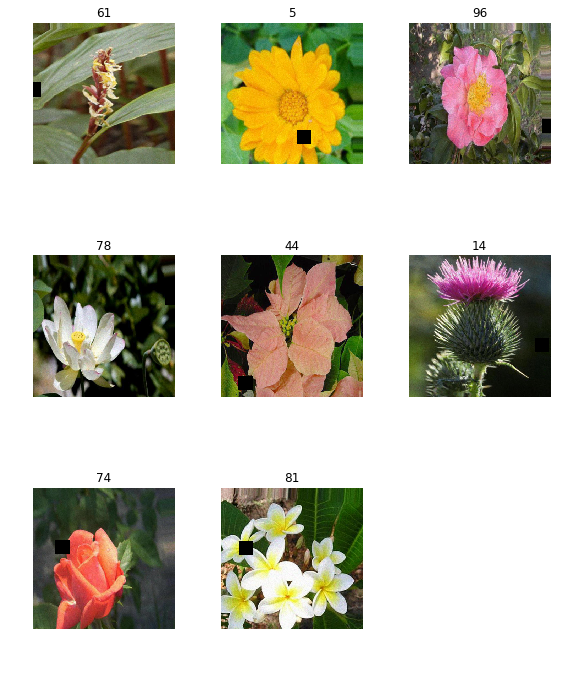

In [12]:
## to see the images in train with there labels
data.show_batch(rows=3, figsize=(8,10))

In [13]:
## print the target classes
print(data.classes)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102]


In [14]:
learn = cnn_learner(data, models.resnet152, metrics=[error_rate, accuracy], model_dir="/tmp/model/")

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /tmp/.cache/torch/checkpoints/resnet152-b121ed2d.pth
100%|██████████| 230M/230M [00:03<00:00, 78.6MB/s]


In [15]:
# defaults.device = torch.device('cuda')

## training with one cycle which used cyclic learning rate and learning rate annhelling
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.513601,0.160131,0.048004,0.951996,14:37


In [16]:
learn.unfreeze()
learn.lr_find()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-3))

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.301558,0.071779,0.018069,0.981931,17:18


In [17]:
preds,_ = learn.TTA(ds_type=DatasetType.Test)

In [18]:
learn1 = cnn_learner(data, models.densenet161, metrics=[error_rate, accuracy], model_dir="/tmp/model/")

Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /tmp/.cache/torch/checkpoints/densenet161-8d451a50.pth
100%|██████████| 110M/110M [00:01<00:00, 75.9MB/s]


In [19]:
learn1.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.576355,0.182315,0.048813,0.951187,14:24


In [20]:
learn1.unfreeze()
learn1.lr_find()
learn1.fit_one_cycle(3, max_lr=slice(1e-6,1e-3))

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.087332,0.024948,0.005663,0.994337,16:58


In [21]:
preds1,_ = learn1.TTA(ds_type=DatasetType.Test)

In [22]:
# learn2 = cnn_learner(data, models.resnet101, metrics=[error_rate, accuracy], model_dir="/tmp/model/")

In [23]:
# learn2.fit_one_cycle(2)

In [24]:
# learn2.unfreeze()
# learn2.lr_find()
# learn2.fit_one_cycle(2, max_lr=slice(1e-6,1e-3))

In [25]:
# preds2,_ = learn2.TTA(ds_type=DatasetType.Test)

In [26]:
learn3 = cnn_learner(data, models.densenet201, metrics=[error_rate, accuracy], model_dir="/tmp/model/")

Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /tmp/.cache/torch/checkpoints/densenet201-c1103571.pth
100%|██████████| 77.4M/77.4M [00:01<00:00, 57.1MB/s]


In [27]:
learn3.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.560624,0.104812,0.029666,0.970334,12:25


In [28]:
learn3.unfreeze()
learn3.lr_find()
learn3.fit_one_cycle(2, max_lr=slice(1e-6, 1e-3))

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.162077,0.015032,0.006472,0.993528,14:22


In [29]:
preds3,_ = learn3.TTA(ds_type=DatasetType.Test)

In [30]:
learn4 = cnn_learner(data, models.densenet169, metrics=[error_rate, accuracy], model_dir="/tmp/model/")

Downloading: "https://download.pytorch.org/models/densenet169-b2777c0a.pth" to /tmp/.cache/torch/checkpoints/densenet169-b2777c0a.pth
100%|██████████| 54.7M/54.7M [00:00<00:00, 70.9MB/s]


In [31]:
learn4.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.534010,0.151910,0.040723,0.959277,10:40


In [32]:
learn4.unfreeze()
learn4.lr_find()
learn4.fit_one_cycle(2, max_lr=slice(1e-6, 1e-3))

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.135819,0.029854,0.008360,0.991640,12:17


In [33]:
preds4,_ = learn4.TTA(ds_type=DatasetType.Test)

In [34]:
# learn5 = cnn_learner(data, models.resnet50, metrics=[error_rate, accuracy], model_dir="/tmp/model/")

In [35]:
# learn5.fit_one_cycle(2)

In [36]:
# learn5.unfreeze()
# learn5.lr_find()
# learn5.fit_one_cycle(2, max_lr=slice(1e-6, 1e-3))

In [37]:
# preds5,_ = learn5.TTA(ds_type=DatasetType.Test)

In [38]:
## create the submission file 
labelled_preds = []
ensemble_preds = preds + preds1 + preds3 + preds4 # + preds5 + preds2
for pred in ensemble_preds:
    labelled_preds.append(int(np.argmax(pred))+1)

submission = pd.DataFrame(
    {'image_id': filenames,
     'category': labelled_preds,
    })
submission.to_csv('submission.csv',index=False)

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [39]:
submission.head()

,image_id,category
0,19341.jpg,20
1,18808.jpg,92
2,18747.jpg,23
3,18549.jpg,89
4,19203.jpg,53


In [40]:
submission['image_id'] = submission['image_id'].apply(lambda x:x.split('.')[0])

In [41]:
submission = submission.sort_values(by = ['image_id'], ascending = [True])

In [42]:
## To download the submission file without Commiting the kernel.

from IPython.display import HTML
import pandas as pd
import numpy as np
import base64

# download it (will only work for files < 2MB or so)
def create_download_link(df, title = "Download CSV file", filename = "subm_5_learn_2_cycle.csv"):  
    csv = df.to_csv(index=False)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(submission)

In [43]:
# os.mkdir('saved_models')
# file_path = '../saved_models'
torch.save(learn, 'resnet152.pth')
torch.save(learn1, 'densenet161.pth')
# torch.save(learn2, 'resnet101.pth')
torch.save(learn3, 'densenet201.pth')
torch.save(learn4, 'densenet169.pth')
# torch.save(learn5, 'resnet50.pth')



TypeError: can't pickle weakref objects